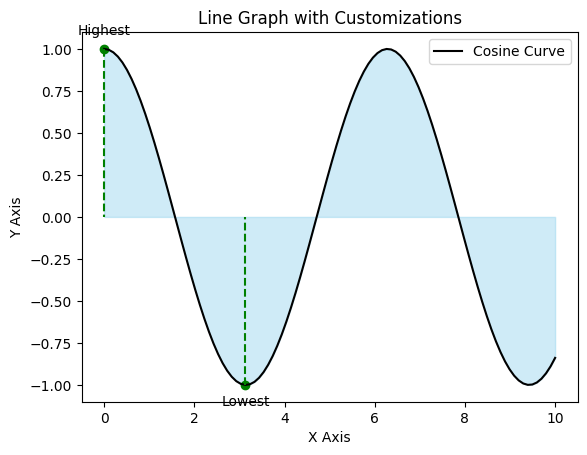

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.cos(x)

# Drawing the line graph
plt.plot(x, y, '-k', label='Cosine Curve')

# 1. Coloring below the line
plt.fill_between(x, y, color="skyblue", alpha=0.4)

# 2. Marking the highest and lowest points
# Identifying the highest and lowest points
ymax = max(y)
ymin = min(y)
xmax = x[y.argmax()]
xmin = x[y.argmin()]

# Marking points with annotations
plt.scatter([xmax, xmin], [ymax, ymin], color="green")  # Mark with dots
plt.annotate('Highest', (xmax, ymax), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Lowest', (xmin, ymin), textcoords="offset points", xytext=(0,-15), ha='center')

# Drawing lines from points to the bottom
plt.plot([xmax, xmax], [ymax, 0], color="green", linestyle="--")
plt.plot([xmin, xmin], [ymin, 0], color="green", linestyle="--")

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Graph with Customizations')
plt.legend()
plt.show()
import pandas as pd


In [6]:
import pandas as pd

usa = pd.read_csv('../../csv/demographics/demographics_usa.csv', thousands =',')

In [7]:
usa.head()

,year,population,births,deaths,tfr
0,1935,127250000,2377000,1392752,2.19
1,1936,128053000,2355000,1479228,2.15
2,1937,128825000,2413000,1450427,2.17
3,1938,129825000,2496000,1381391,2.22
4,1939,130880000,2466000,1387897,2.17


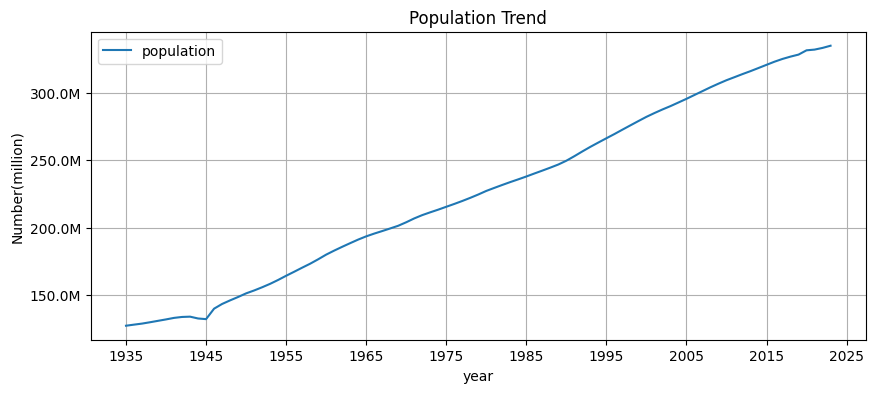

In [16]:
import matplotlib.ticker as ticker


def millions_formatter(x, pos):
    return f'{x / 1_000_000}M'

def thousands_formatter(x, pos):
    return f'{x / 1_000}K'

def billions_formatter(x, pos):
    return f'{x / 1_000_000_000}B'

ax = usa.plot(x='year', y='population', figsize=(10, 4))
ax.set_ylabel("Number(million)")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax.set_xticks(np.arange(usa['year'].min(),usa['year'].max()+3,10))
ax.grid(True)

plt.title('Population Trend')
plt.show()

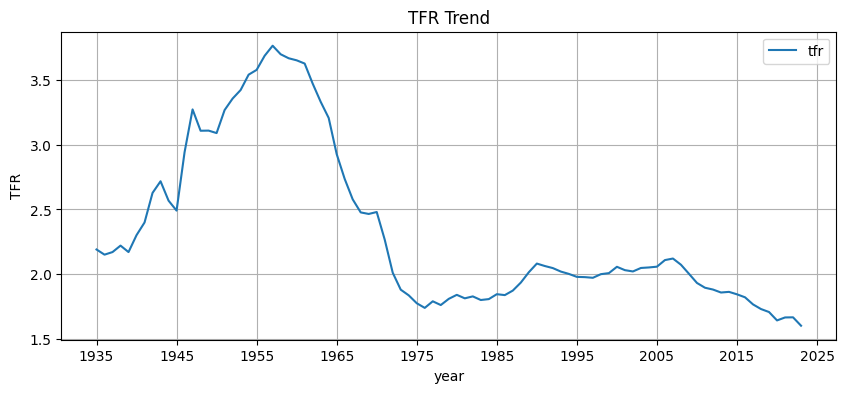

In [21]:
ax = usa.plot(x='year', y='tfr', figsize=(10, 4))
ax.set_ylabel("TFR")
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax.set_xticks(np.arange(usa['year'].min(),usa['year'].max()+3,10))
ax.grid(True)

plt.title('TFR Trend')
plt.show()

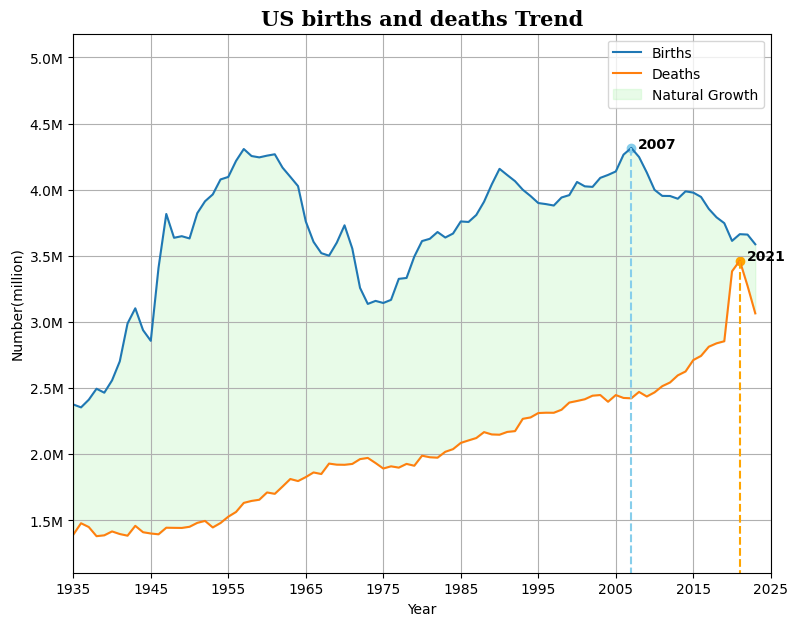

In [86]:

min_pop = min(usa['births'].min(), usa['deaths'].min())

ax = usa.plot(x='year', y=['births','deaths'], figsize=(9,7), label=['Births', 'Deaths'])
ax.set_ylabel("Number(million)")
ax.set_xlabel("Year")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
ax.set_xticks(np.arange(usa['year'].min(),usa['year'].max()+3,10))
ax.grid(True)
ax.set_ylim(min_pop*0.8,usa['births'].max() * 1.2)
ax.set_xlim(1935,2025)

# Natural Growth
plt.fill_between(usa['year'], usa['births'], usa['deaths'], where=(usa['births'] > usa['deaths']), color='lightgreen', alpha=0.2, label='Natural Growth')

# Highest Deaths
max_deaths_row = usa.iloc[usa['deaths'].idxmax()]
plt.scatter([max_deaths_row['year']], [max_deaths_row['deaths']], color="orange")  # Mark with dots
plt.annotate(
    f'{max_deaths_row['year']:.0f}', 
    (max_deaths_row['year'], max_deaths_row['deaths']), 
    textcoords="offset points", 
    xytext=(5,0), 
    ha='left',
    # color='brown',
    fontweight='bold'
)
plt.plot([max_deaths_row['year'], max_deaths_row['year']], [max_deaths_row['deaths'], 0], color="orange", linestyle="--")



# Highest Births
max_births_row = usa.iloc[usa['births'].idxmax()]
plt.scatter([max_births_row['year']], [max_births_row['births']], color="skyblue")  # Mark with dots
plt.annotate(
    f'{max_births_row['year']:.0f}', 
    (max_births_row['year'], max_births_row['births']), 
    textcoords="offset points", 
    xytext=(5,0), 
    ha='left',
    # color='brown',
    fontweight='bold'
)
plt.plot([max_births_row['year'], max_births_row['year']], [max_births_row['births'], 0], color="skyblue", linestyle="--")


plt.legend()
plt.title('US births and deaths Trend', fontweight='bold', fontname='serif', fontsize=15)
plt.show()

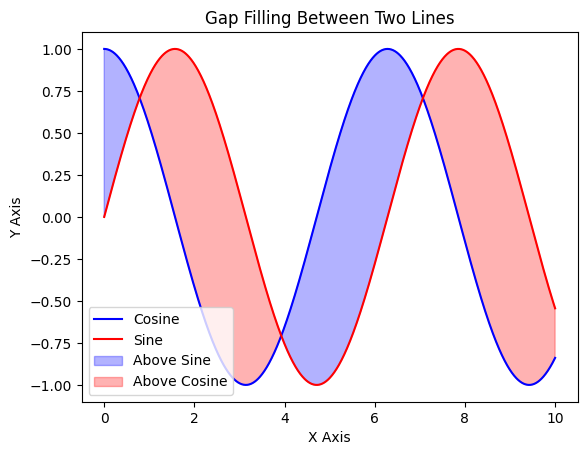

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 1000)
y1 = np.cos(x)
y2 = np.sin(x)

# Plotting both lines
plt.plot(x, y1, '-b', label='Cosine')
plt.plot(x, y2, '-r', label='Sine')

# Filling the gap between the two lines
plt.fill_between(x, y1, y2, where=(y1 > y2), color='blue', alpha=0.3, label='Above Sine')
plt.fill_between(x, y1, y2, where=(y2 > y1), color='red', alpha=0.3, label='Above Cosine')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Gap Filling Between Two Lines')
plt.legend()
plt.show()
